In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
#  Generate synthetic data
np.random.seed(42)
num_samples = 100

# Features
feature1 = np.random.uniform(1, 100, num_samples)  # Random values between 1 and 100
feature2 = np.random.uniform(1, 50, num_samples)   # Random values between 1 and 50
feature3 = np.random.uniform(10, 200, num_samples) # Random values between 10 and 200
feature4 = np.random.uniform(5, 300, num_samples)  # Random values between 5 and 300
feature5 = np.random.uniform(20, 400, num_samples) # Random values between 20 and 400

# Target variable with some correlation to features
target = (
    0.3 * feature1 +
    0.5 * feature2 +
    0.2 * feature3 +
    np.random.normal(0, 10, num_samples)  # Adding noise
)

# Create a DataFrame
data = {
    "Feature1": feature1,
    "Feature2": feature2,
    "Feature3": feature3,
    "Feature4": feature4,
    "Feature5": feature5,
    "Target": target,
}
df = pd.DataFrame(data)

# Save to CSV
csv_filename = "qundle_dataset.csv"
df.to_csv(csv_filename, index=False)
print(f"CSV file '{csv_filename}' created with synthetic data.")

CSV file 'qundle_dataset.csv' created with synthetic data.


In [4]:
#  Calculate the correlation matrix
correlation_matrix = df.corr()
print("Correlation Coefficient Matrix:\n", correlation_matrix)

Correlation Coefficient Matrix:
           Feature1  Feature2  Feature3  Feature4  Feature5    Target
Feature1  1.000000 -0.034033 -0.037654 -0.211882  0.120075  0.586654
Feature2 -0.034033  1.000000 -0.146354 -0.011783 -0.082393  0.300831
Feature3 -0.037654 -0.146354  1.000000 -0.214816 -0.034695  0.445490
Feature4 -0.211882 -0.011783 -0.214816  1.000000  0.187530 -0.361422
Feature5  0.120075 -0.082393 -0.034695  0.187530  1.000000 -0.011003
Target    0.586654  0.300831  0.445490 -0.361422 -0.011003  1.000000


In [6]:

#  Select the top 3 features with the highest correlation to the target variable
correlation_target = correlation_matrix['Target'].abs()
top_3_features = correlation_target.sort_values(ascending=False).index[1:4]
print(f"Top 3 features: {top_3_features}")

Top 3 features: Index(['Feature1', 'Feature3', 'Feature4'], dtype='object')


In [8]:
# Prepare the data for model training using the top 3 features
X = df[top_3_features]
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Forecasting: Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 148.54482836532554


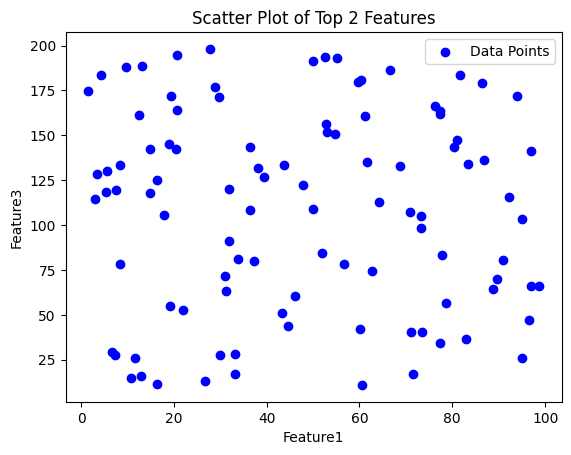

In [9]:
# Plotting Dots in 2D space (Top 2 Features)
plt.scatter(df[top_3_features[0]], df[top_3_features[1]], c='blue', label="Data Points")
plt.xlabel(top_3_features[0])
plt.ylabel(top_3_features[1])
plt.title("Scatter Plot of Top 2 Features")
plt.legend()
plt.show()


In [11]:
#  N-Dimensional Distance Calculation: Euclidean Distance for two points (Example)
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

# Example points (take two rows from the dataset or provide your own points)
point1 = df[top_3_features].iloc[0].values
point2 = df[top_3_features].iloc[1].values

distance = euclidean_distance(point1, point2)
print(f"Euclidean Distance between the two points: {distance}")

Euclidean Distance between the two points: 185.77627253336823
